## Heart Disease Prediction


### Problem Statement

Cardiovascular diseases are one of the leading causes of death globally.  
Early detection of heart disease can save lives by enabling timely medical intervention.  
However, manual diagnosis is time-consuming and requires expert knowledge.  

The goal of this project is to **build a machine learning model that predicts whether a patient is likely to have heart disease** based on clinical and demographic attributes.

**Dataset: [Heart Disease Prediction](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)**

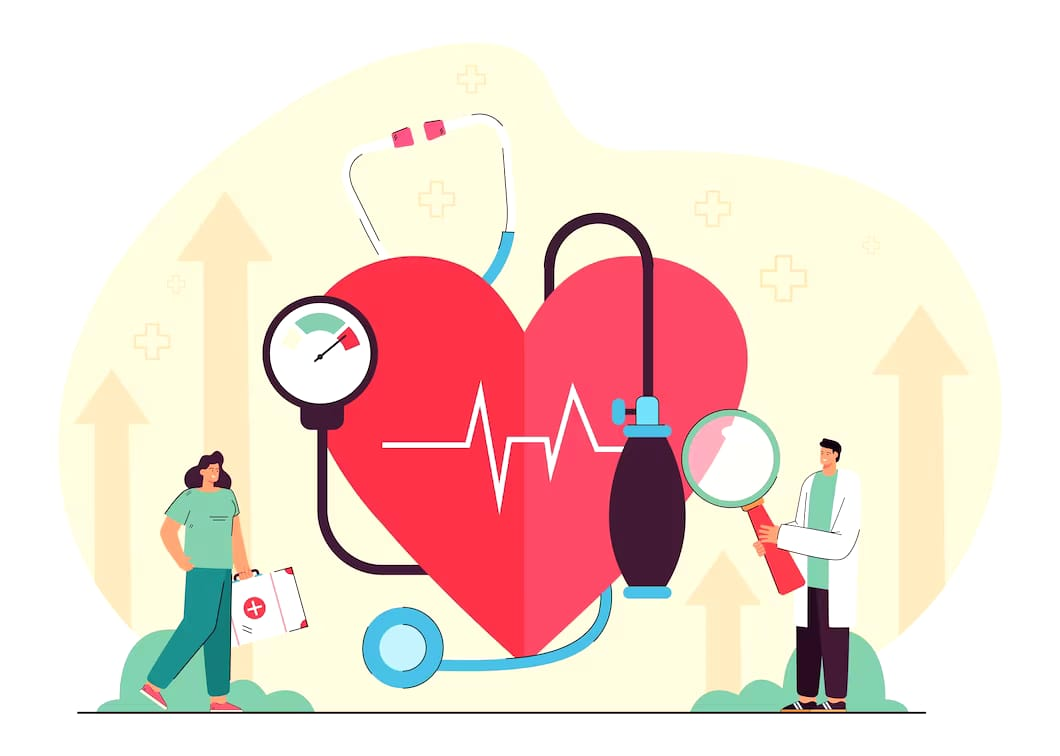

### Features 

- **Age**: Age of the patient (in years).  
- **Sex**: Gender of the patient (1 = male, 0 = female).  
- **Chest pain type (cp)**: Type of chest pain experienced.  
  - 0 = Typical angina  
  - 1 = Atypical angina  
  - 2 = Non-anginal pain  
  - 3 = Asymptomatic  
- **Resting blood pressure (trestbps)**: Patient’s resting blood pressure (in mm Hg).  
- **Cholesterol level (chol)**: Serum cholesterol level (mg/dl).  
- **Fasting blood sugar (fbs)**: Indicates if fasting blood sugar > 120 mg/dl (1 = true, 0 = false).  
- **Resting ECG results (restecg)**: Results of resting electrocardiogram.  
  - 0 = Normal  
  - 1 = ST-T wave abnormality  
  - 2 = Left ventricular hypertrophy  
- **Maximum heart rate achieved (thalach)**: The highest heart rate achieved during exercise.  
- **Exercise-induced angina (exang)**: Angina induced by exercise (1 = yes, 0 = no).  
- **ST depression (oldpeak)**: Depression induced by exercise relative to rest (measure of exercise stress).  
- **Slope of the ST segment (slope)**: Slope of the peak exercise ST segment.  
  - 0 = Upsloping  
  - 1 = Flat  
  - 2 = Downsloping  
- **Number of major vessels (ca)**: Number of major vessels (0–3) colored by fluoroscopy.  
- **Thalassemia (thal)**: A blood disorder test result.  
  - 0 = Normal  
  - 1 = Fixed defect (no blood flow)  
  - 2 = Reversible defect (some blood flow observed)  

---

### Target Variable

- **1 → Patient has heart disease**  
- **0 → Patient does not have heart disease**  

---

### Project Impact

By leveraging data-driven approaches, the model will help:  
- **Doctors**: support clinical decision-making  
- **Patients**: get an early risk assessment  
- **Healthcare systems**: prioritize preventive care and resource allocation  

### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

### 1. Data Understanding:

#### A. Read the CSV file

In [2]:
heart = pd.read_csv("heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### B. Print shape and Column of the dataset

In [3]:
# shape of the dataset
shape = heart.shape
print(f"Shape of the dataset:",shape)
print()
# columns present in the dataset
columns = heart.columns
print(f"Columns present in the dataset:\n", columns)

Shape of the dataset: (1025, 14)

Columns present in the dataset:
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


#### Observation:
There are 1025 rows and 14 columns present in the dataset.

#### C. Information about the dataset

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


#### Insight:
- The dataset contains **1 float-type feature** and **13 integer-type features**.
- **Integer features:** age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, slope, ca, thal, target   
- **Float features:** oldpeak.
- There are **no missing values** in the dataset.

#### D. Check for missing values

In [5]:
missing_values = heart.isnull().sum()
print(missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


#### Insight:
As mentioned above, there are no missing values present in the dataset.

#### E. Check for duplicate values

In [6]:
duplicates = heart.duplicated().sum()

if duplicates==0:
    print("There are no duplicate values present in the dataset")
else:
    print("There are duplicate values present in the dataset:", duplicates)

There are duplicate values present in the dataset: 723


#### Insight:
- Let's drop the duplicate values

#### Drop the duplicate values

In [7]:
print("Before dropping duplicates:", heart.shape)
heart = heart.drop_duplicates()
print("After dropping duplicates:", heart.shape)

Before dropping duplicates: (1025, 14)
After dropping duplicates: (302, 14)


#### F. Check the number of unique rows in each column

In [8]:
numerical_columns = heart.select_dtypes(include=["number"]).columns

for col in numerical_columns:
    print(f"{col}: {heart[col].unique()}\n")

age: [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]

sex: [1 0]

cp: [0 1 2 3]

trestbps: [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]

chol: [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]

fbs: 

In [9]:
heart.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

#### Insight:

1. **Age & Sex**: Patients range from **29–77 years**, mostly middle-aged.  
   Dataset includes both genders; men generally have a higher heart disease risk.

2. **Chest Pain Type**: Four categories — typical, atypical, non-anginal, asymptomatic.  
   **Asymptomatic** patients often have higher risk.

3. **Blood Pressure & Cholesterol**:  
   - Resting BP: **94–200 mm Hg** (≥140 indicates hypertension).  
   - Cholesterol: **126–564 mg/dl** (≥240 high risk; extreme outliers exist).

4. **Key Tests**:  
   - Fasting blood sugar (fbs)  
   - Resting ECG results (restecg)  
   - Maximum heart rate achieved (thalach: 71–202 bpm) — all useful predictors of heart disease.

5. **Exercise Stress Indicators**:  
   - Exercise-induced angina (exang)  
   - Oldpeak (0.0–6.2 ST depression) — both strongly correlate with heart disease.

6. **Heart Anatomy**:  
   - Slope of ST segment (slope)  
   - Number of major vessels blocked (ca: 0–4) — strong predictors.

7. **Thalassemia & Target**:  
   - Thal values represent blood flow defects.  
   - Target variable is balanced binary classification (0 = no disease, 1 = disease).


#### G. Statistical summary

In [10]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Statistical Summary Insights
**Dataset Overview**
- **Total records:** 302
- **Target variable (`target`) distribution:** ~54% positive (heart disease present), ~46% negative.

#### Feature Insights
1. **Age (`age`)**
- **Mean:** 54.42 years
- **Median:** 55.5 years → fairly symmetrical distribution.
- **Range:** 29–77 years
- **Insight:** Most patients are middle-aged to elderly (48–61 years is the interquartile range). Age is an important risk factor for heart disease.

2. **Sex (`sex`)**
- **Mean:** 0.68 → ~68% male (1 = male, 0 = female).
- **Insight:** Dataset is male-skewed; gender bias should be considered in modeling.

3. **Chest Pain Type (`cp`)**
- **Values:** 0–3 (categorical)
- **Mean:** 0.96
- **Insight:** Majority have low chest pain types (likely angina). Distribution suggests chest pain type might be an important predictor.

4. **Resting Blood Pressure (`trestbps`)**
- **Mean:** 131.6 mmHg
- **Median:** 130 mmHg
- **Range:** 94–200 mmHg
- **Insight:** Some high BP values present, could be correlated with heart disease.

5. **Cholesterol (`chol`)**
- **Mean:** 246.5 mg/dl
- **Median:** 240.5 mg/dl
- **Range:** 126–564 mg/dl
- **Insight:** Wide variation; higher cholesterol levels might correlate with heart disease. Outliers exist (564 mg/dl).

6. **Fasting Blood Sugar (`fbs`)**
- **Mean:** 0.15 (15% > 120 mg/dl)
- **Insight:** Low proportion of high fasting sugar, may not be a strong predictor alone.

7. **Resting ECG (`restecg`)**
- **Values:** 0–2
- **Mean:** 0.53
- **Insight:** Resting ECG results vary, possible predictor of heart disease.

8. **Max Heart Rate Achieved (`thalach`)**
- **Mean:** 149.57 bpm
- **Median:** 152.5 bpm
- **Range:** 71–202 bpm
- **Insight:** Lower max heart rate might be associated with heart disease.

9. **Exercise Induced Angina (`exang`)**
- **Mean:** 0.33 (33% positive)
- **Insight:** Significant proportion have angina with exercise → important feature.

10. **ST Depression (`oldpeak`)**
- **Mean:** 1.04
- **Range:** 0–6.2
- **Insight:** Higher oldpeak values might correlate with heart disease risk.

11. **Slope of ST Segment (`slope`)**
- **Mean:** 1.4 (categorical: 0–2)
- **Insight:** Distribution varies; important ECG feature for prediction.

12. **Number of Major Vessels (`ca`)**
- **Mean:** 0.72
- **Range:** 0–4
- **Insight:** More vessels → higher heart disease risk.

13. **Thalassemia (`thal`)**
- **Mean:** 2.31
- **Values:** 0–3 (categorical)
- **Insight:** Different thalassemia types may influence heart disease prediction.

14. **Target (`target`)**
- **Mean:** 0.54 → 54% positive cases.
- **Insight:** Balanced dataset (slight imbalance).

#### Overall Insight

The dataset reveals that heart disease risk is most strongly influenced by age, gender, chest pain type, maximum heart rate, ST depression, exercise-induced angina, and the number of major vessels, with noticeable variation in cholesterol and blood pressure levels.

### 2. Data Exploration and Analysis:

#### Univarient Analysis

#### A. Visualize distribution of all the numerical features using a histogram and clearly share insights

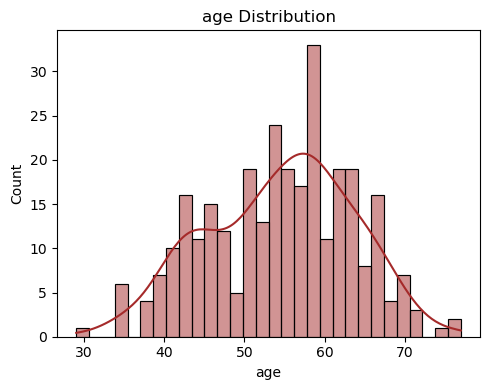

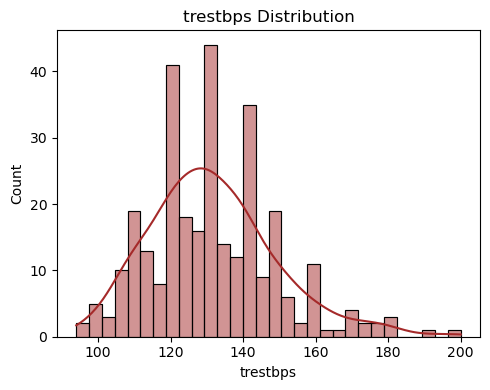

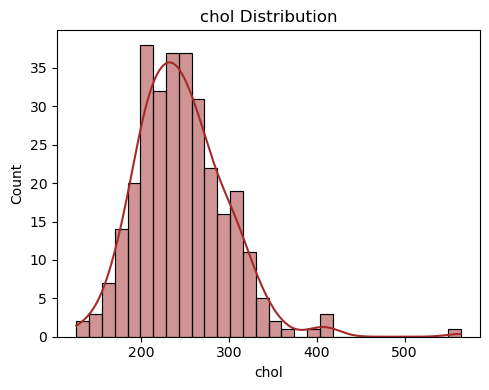

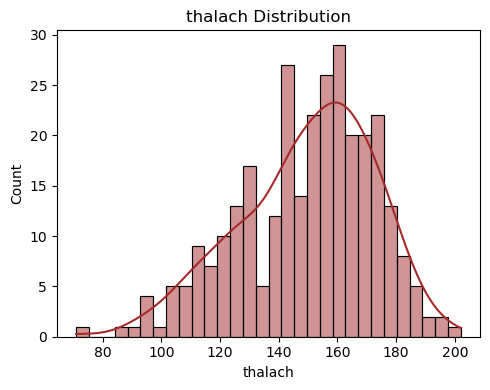

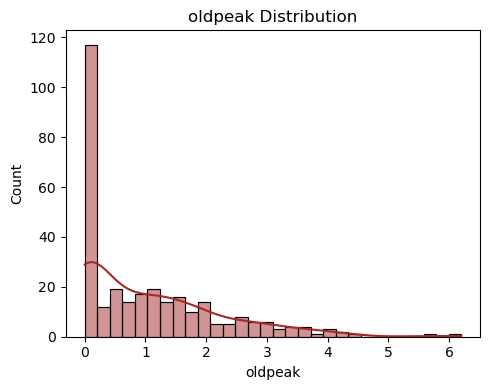

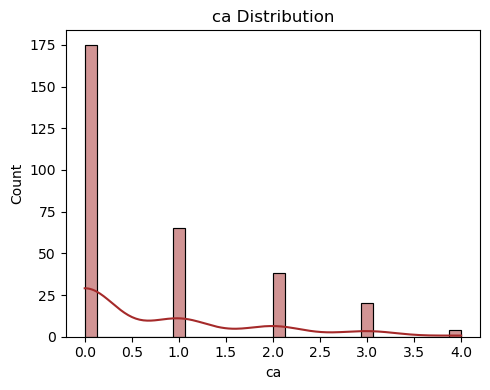

In [11]:
# Loop through all columns and plot histograms
num_col = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]
for col in num_col:
    plt.figure(figsize=(5, 4))
    sns.histplot(heart[col], kde=True, bins=30, color= "brown")
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

#### Histogeam for Numarical columns Insights:
- **Age** – Slightly right-skewed; most patients are between **50–60 years**, indicating age is a relevant predictor for heart disease.
- **Resting Blood Pressure (`trestbps`)** – Mostly normal distribution with a peak around **120–140 mmHg**; some high outliers exist, indicating hypertensive patients who may have higher risk.
- **Cholesterol (`chol`)** – Right-skewed with extreme outliers (up to 564 mg/dl); most values are between **200–300 mg/dl**, making cholesterol an important predictor.
- **Max Heart Rate (`thalach`)** – Roughly normal distribution, peak near **150 bpm**; lower heart rate values may correlate with higher heart disease risk.
- **ST Depression (`oldpeak`)** – Right-skewed; most values are close to 0 but some are high (up to 6.2), making it a strong risk indicator.
- **Number of Major Vessels (`ca`)** – Highly skewed; majority have **0–1 vessel affected**, but more vessels affected likely increases risk.
- **Overall** – Several numerical features are skewed and have outliers (cholesterol, oldpeak, ca), which should be handled during preprocessing. These features are potentially strong predictors for heart disease.

#### B. Visualize outliers present in all the numerical variables using a boxplot and clearly share insights¶

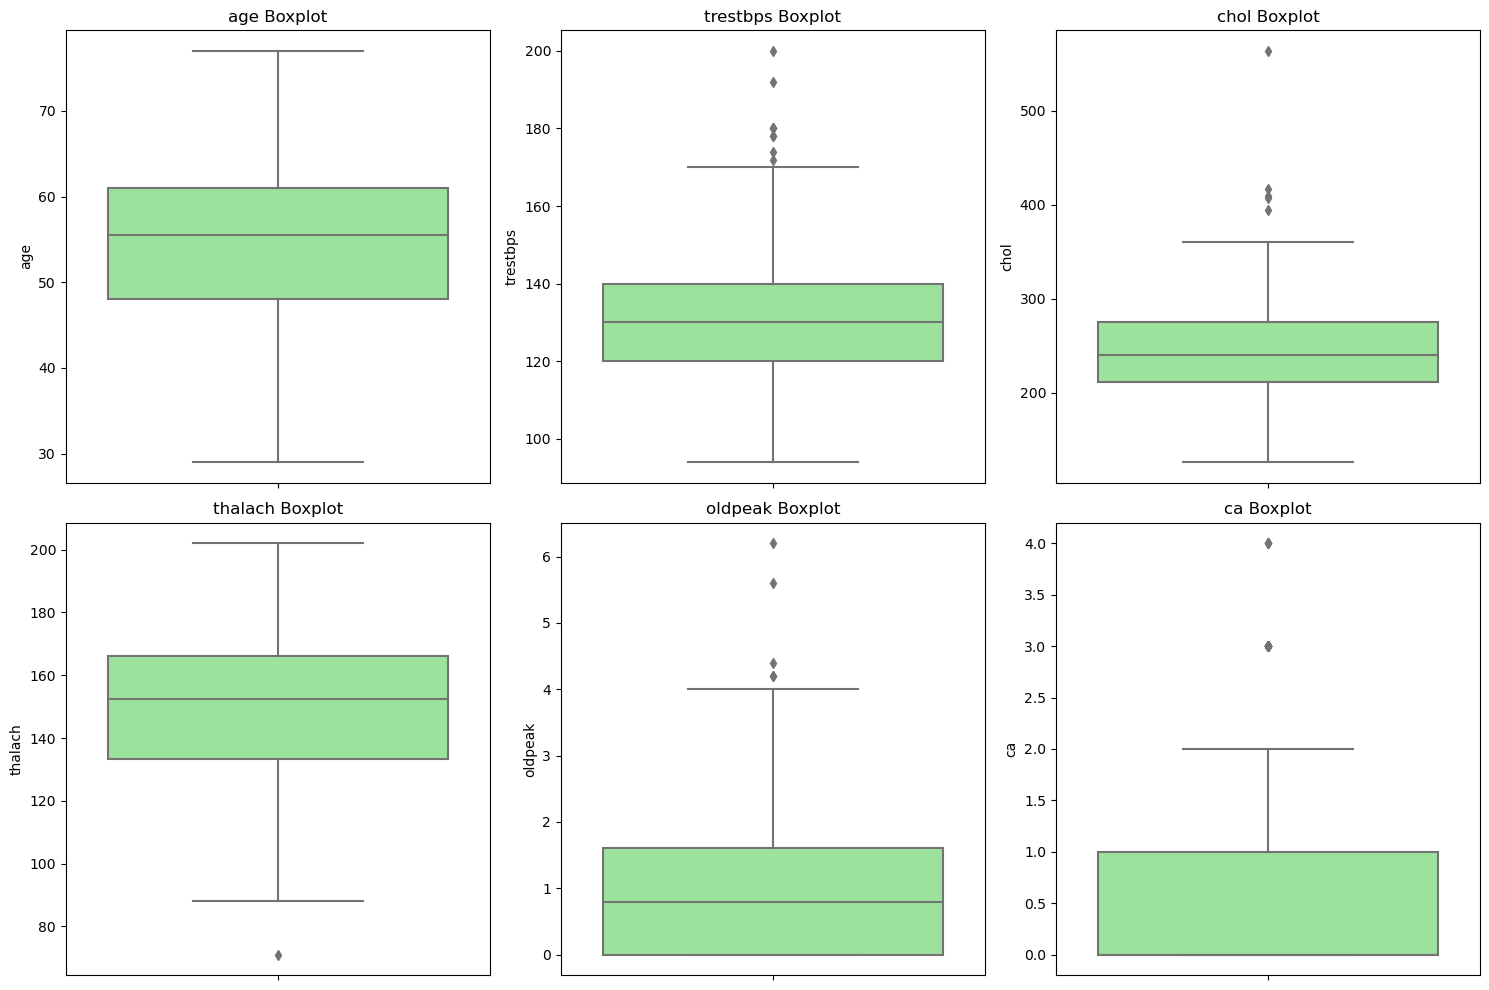

In [12]:
num_col = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_col, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=heart[col], color="lightgreen")
    plt.title(f"{col} Boxplot")
    plt.tight_layout()

plt.show()

### Outlier Insights from Boxplots

1. **Age**
- Outliers present above ~70 years.
- **Insight:** These represent the oldest patients; age extremes could influence prediction and may need special consideration.

2. **Resting Blood Pressure (`trestbps`)**
- Outliers above ~160 mmHg.
- **Insight:** High blood pressure values are rare but could strongly correlate with heart disease.

3. **Cholesterol (`chol`)**
- Significant outliers above ~400 mg/dl, some exceeding 500 mg/dl.
- **Insight:** Extreme cholesterol levels are rare but potentially highly relevant; consider outlier treatment or transformation.

4. **Max Heart Rate (`thalach`)**
- Few outliers below ~90 bpm.
- **Insight:** Low heart rate extremes might be associated with higher heart disease risk.

5. **ST Depression (`oldpeak`)**
- Outliers above ~4.0.
- **Insight:** Large deviations in ST depression are rare but important indicators for heart disease.

6. **Number of Major Vessels (`ca`)**
- Outliers at 3 and 4 vessels.
- **Insight:** Patients with many vessels affected are rare but highly relevant for risk prediction.

#### Overall Insight:
Numerical features have notable outliers, especially chol, trestbps, oldpeak, and ca. These outliers should be carefully handled during preprocessing (via clipping, transformation, or robust scaling), as they can strongly influence the model and its predictions.

#### C. Visualize distribution of categorical features using countplot and clearly share insights

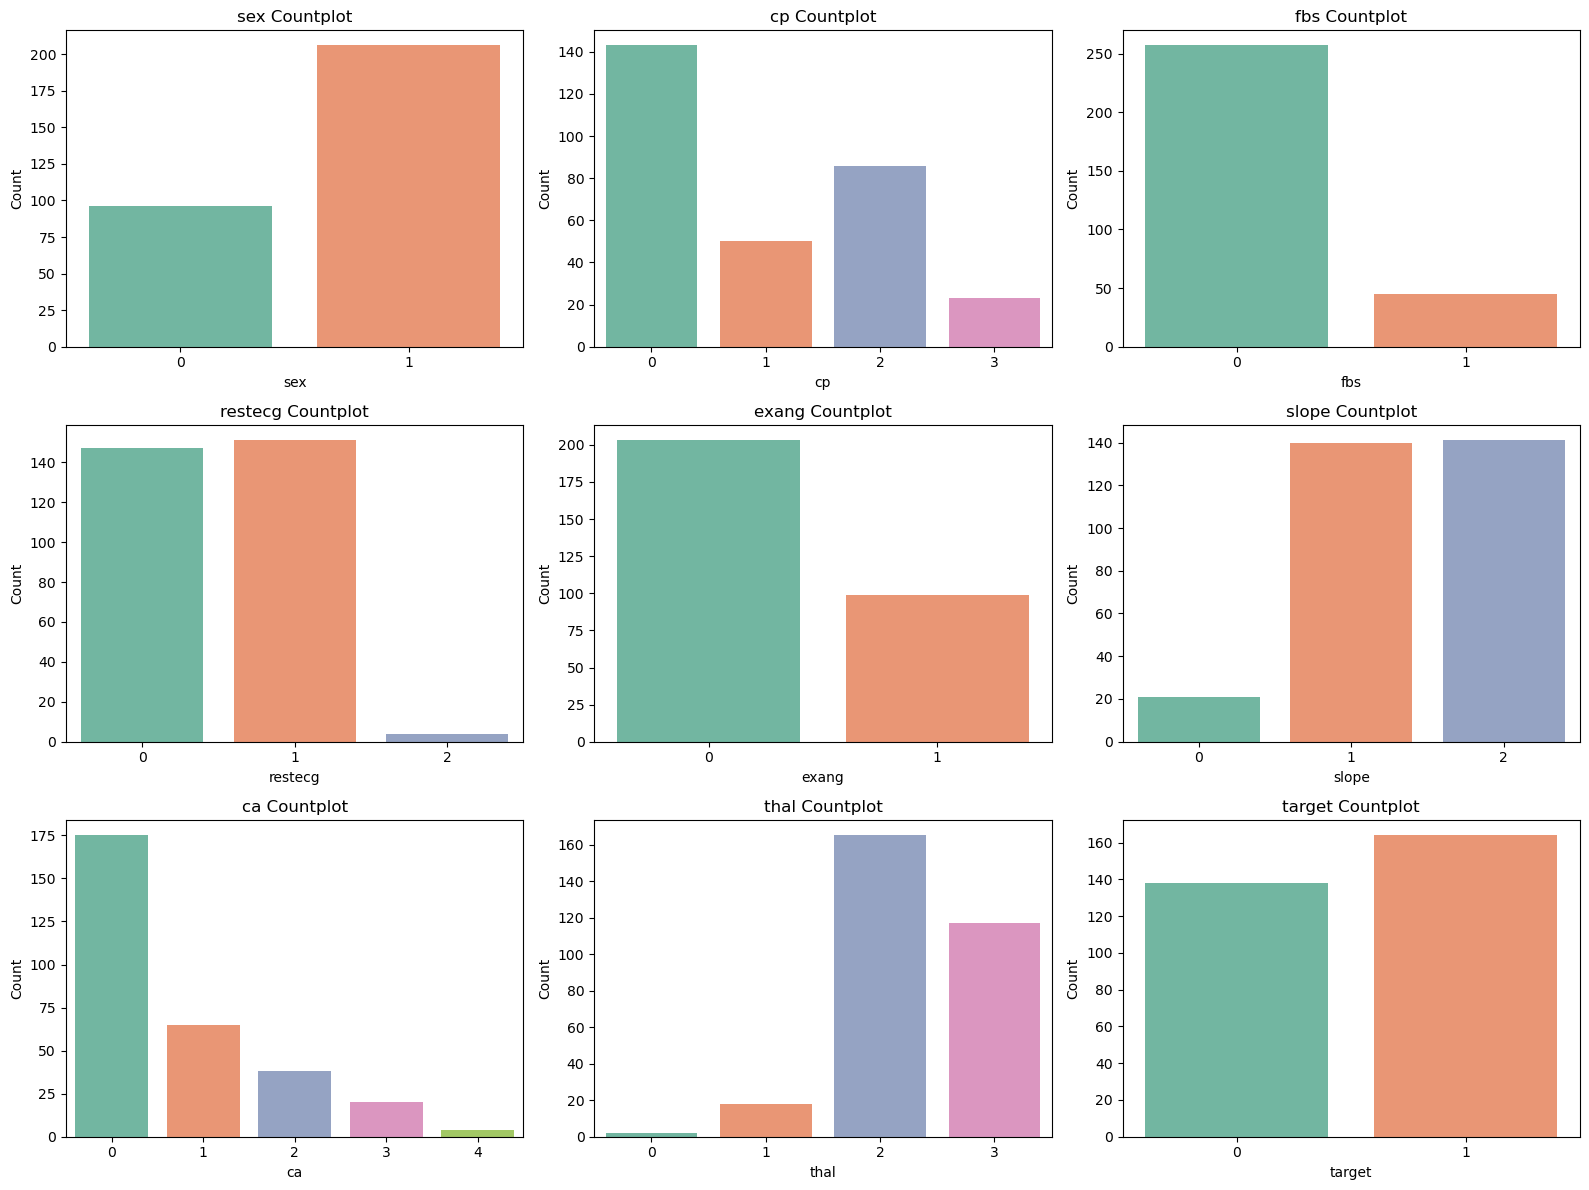

In [13]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=heart[col], palette="Set2")
    plt.title(f"{col} Countplot")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()

plt.show()

#### Categorical Variable Insights

1. **Sex**:
- Males (~68%) outnumber females (~32%).
- **Insight:** Dataset is male-skewed; gender imbalance may affect predictions and should be noted.

3. **Chest Pain Type (`cp`)**:  
- Most patients have type 0 and type 1 chest pain; fewer cases for type 2 and type 3.
- **Insight:** Chest pain type is an important predictor; distribution imbalance could influence model performance.

4. **Fasting Blood Sugar (`fbs`)**:  
- Majority (~85%) have fasting blood sugar ≤ 120 mg/dl (fbs = 0); small portion (15%) have fbs = 1.
- **Insight:** Low occurrence of high fasting sugar may reduce its predictive power

5. **Resting ECG (`restecg`)**:  
- Majority are normal (restecg = 1) or have minor abnormalities (restecg = 0); fewer have significant abnormalities (restecg = 2).
- **Insight:** Resting ECG distribution is skewed toward normal results.

6. **Exercise-Induced Angina (`exang`)**:  
- ~67% have no angina (exang = 0), ~33% have angina (exang = - The dataset is reasonably balanced, with a slight tilt toward heart disease cases — approximately 46% without heart disease (0) and 54% with heart disease (1).
- **Insight:** Angina is relatively common and likely a strong predictor.

7. **Slope**:  
- Most values are slope = 2 and slope = 1; slope = 0 is rare.
- **Insight:** Uneven distribution could affect slope’s predictive impact.

8. **Number of Major Vessels (ca)**:  
- Majority have 0 vessels affected; fewer cases with higher vessel counts.
- **Insight:** Higher vessel counts are rare but important for prediction.

9. **Thalassemia (thal)**:  
- Most cases are thal = 2; fewer in thal = 3 and thal = 1; thal = 0 is rare.
- **Insight:** Uneven distribution should be considered when encoding categorical features.

10. **Target**:  
- The dataset is reasonably balanced, with a slight tilt toward heart disease cases — approximately 46% without heart disease (0) and 54% with heart disease (1).

#### Bivariate Analysis 

#### D. Numerical Features vs Target:

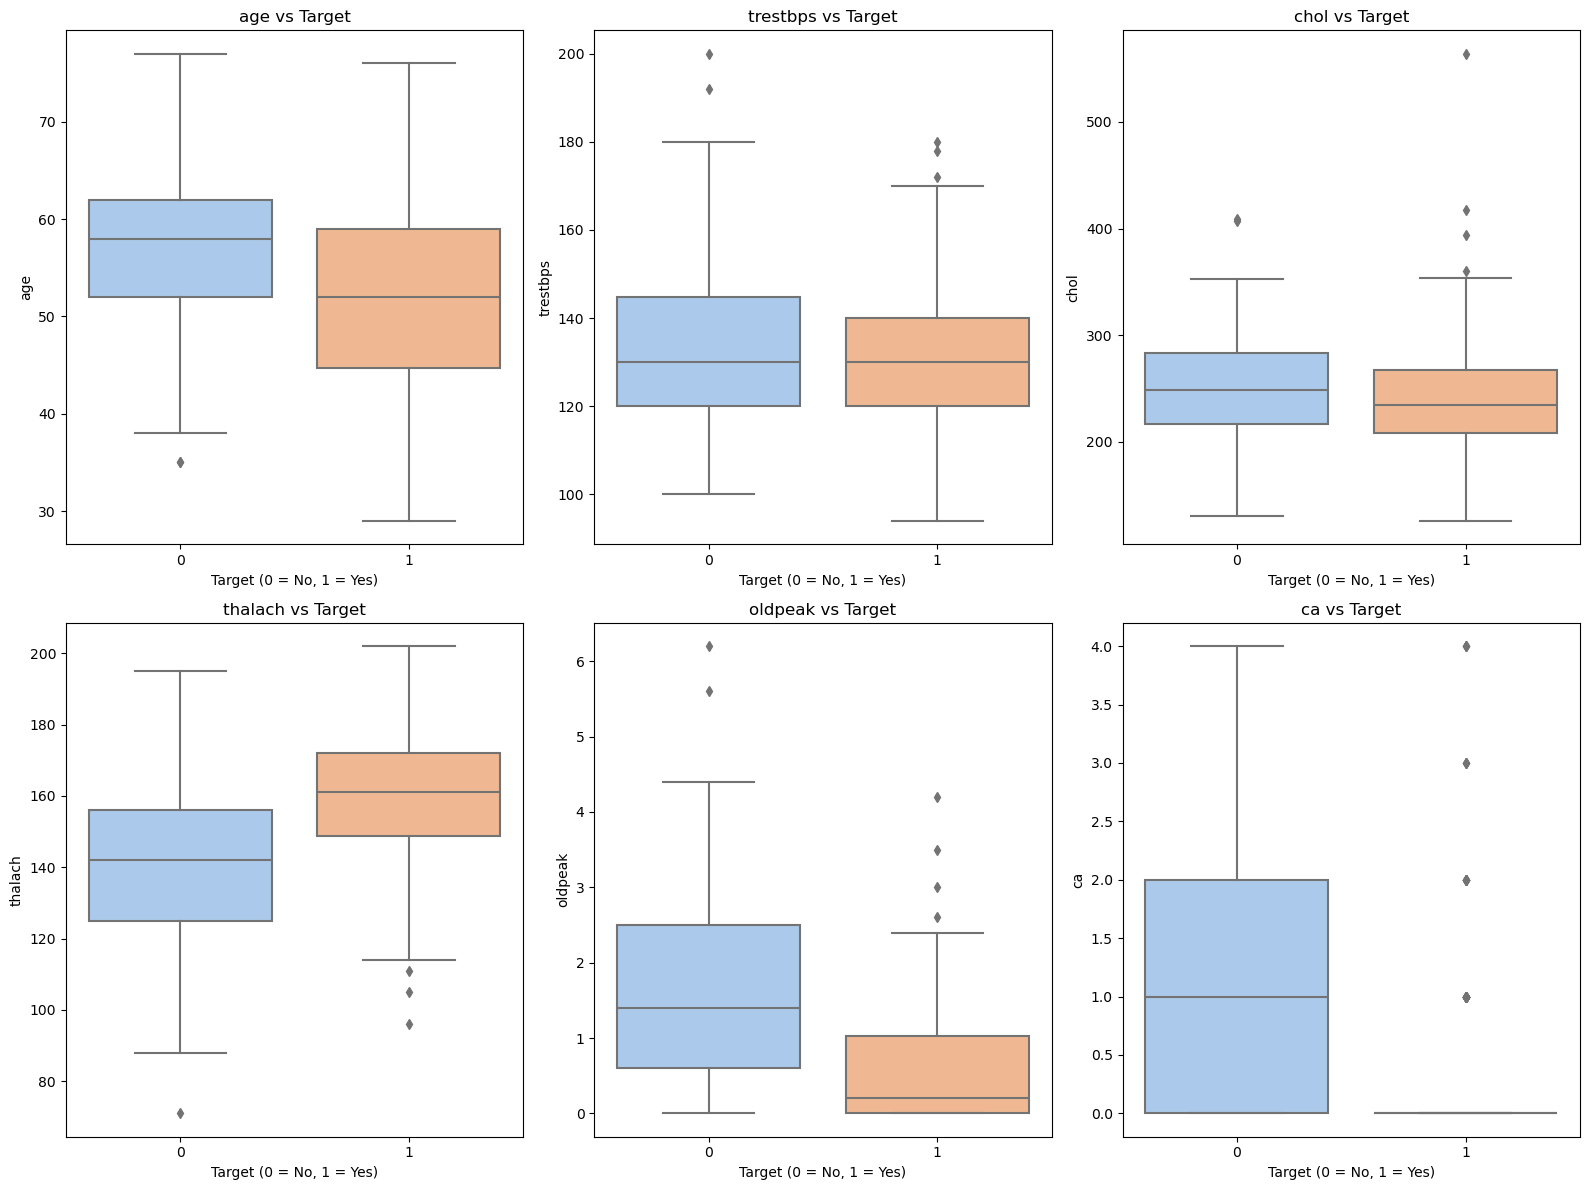

In [14]:
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=heart['target'], y=heart[col], palette="pastel")
    plt.title(f"{col} vs Target")
    plt.xlabel("Target (0 = No, 1 = Yes)")
    plt.ylabel(col)
    plt.tight_layout()

plt.show()

#### Insights for Numerical Features vs Target:
- **Age:** Heart disease patients tend to be older.
- **Resting Blood Pressure (`trestbps`):** Slightly higher in heart disease cases.
- **Cholesterol (`chol`):** Higher values are more common in heart disease cases.
- **Max Heart Rate (`thalach`):** Lower in heart disease patients
- **ST Depression (`oldpeak`):** Higher in heart disease patients.
- **Number of Major Vessels (`ca`):** Higher counts are more frequent in heart disease cases.

#### E. Categorical Features vs Target

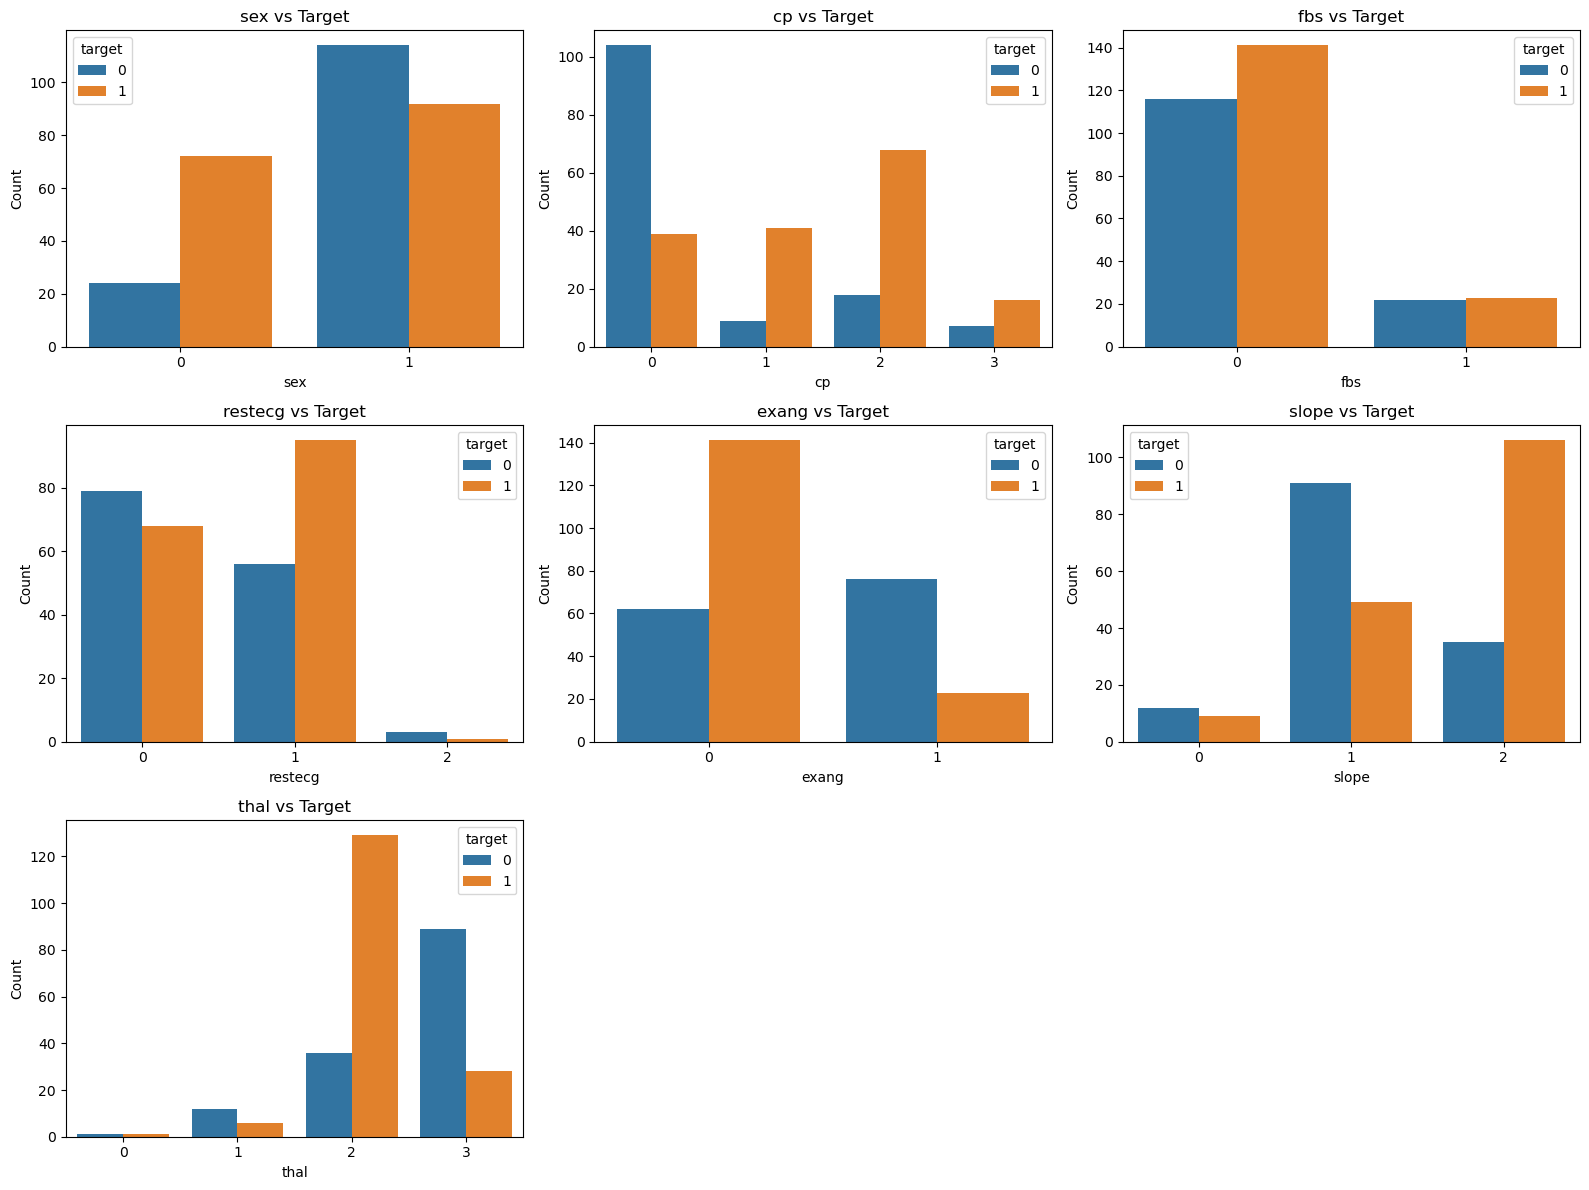

In [15]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=heart[col], hue=heart["target"])
    plt.title(f"{col} vs Target")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()

plt.show()

#### Insights for Categorical Features vs Target:

- **Sex:** Males have a higher proportion of heart disease than females.
- **Chest Pain Type (cp):** Higher chest pain types (1–3) are more associated with heart disease.
- **Fasting Blood Sugar (fbs):** Slightly higher heart disease proportion when fasting blood sugar > 120 mg/dl, but effect is small.
- **Resting ECG (restecg):** Minor ECG abnormalities (restecg = 1) are more common in heart disease cases.
- **Exercise Induced Angina (exang):** Strong correlation — heart disease is more frequent when angina is present.
- **Slope:** Certain slope values are more common in heart disease cases.
- **Thalassemia (thal):** Specific thal types (especially thal = 3) have higher heart disease prevalence.

#### Multivariate analysis

#### F. Visualize a corrilation matrix and clearly share insights.

In [16]:
# Compute correlation matrix
corr_matrix = heart.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


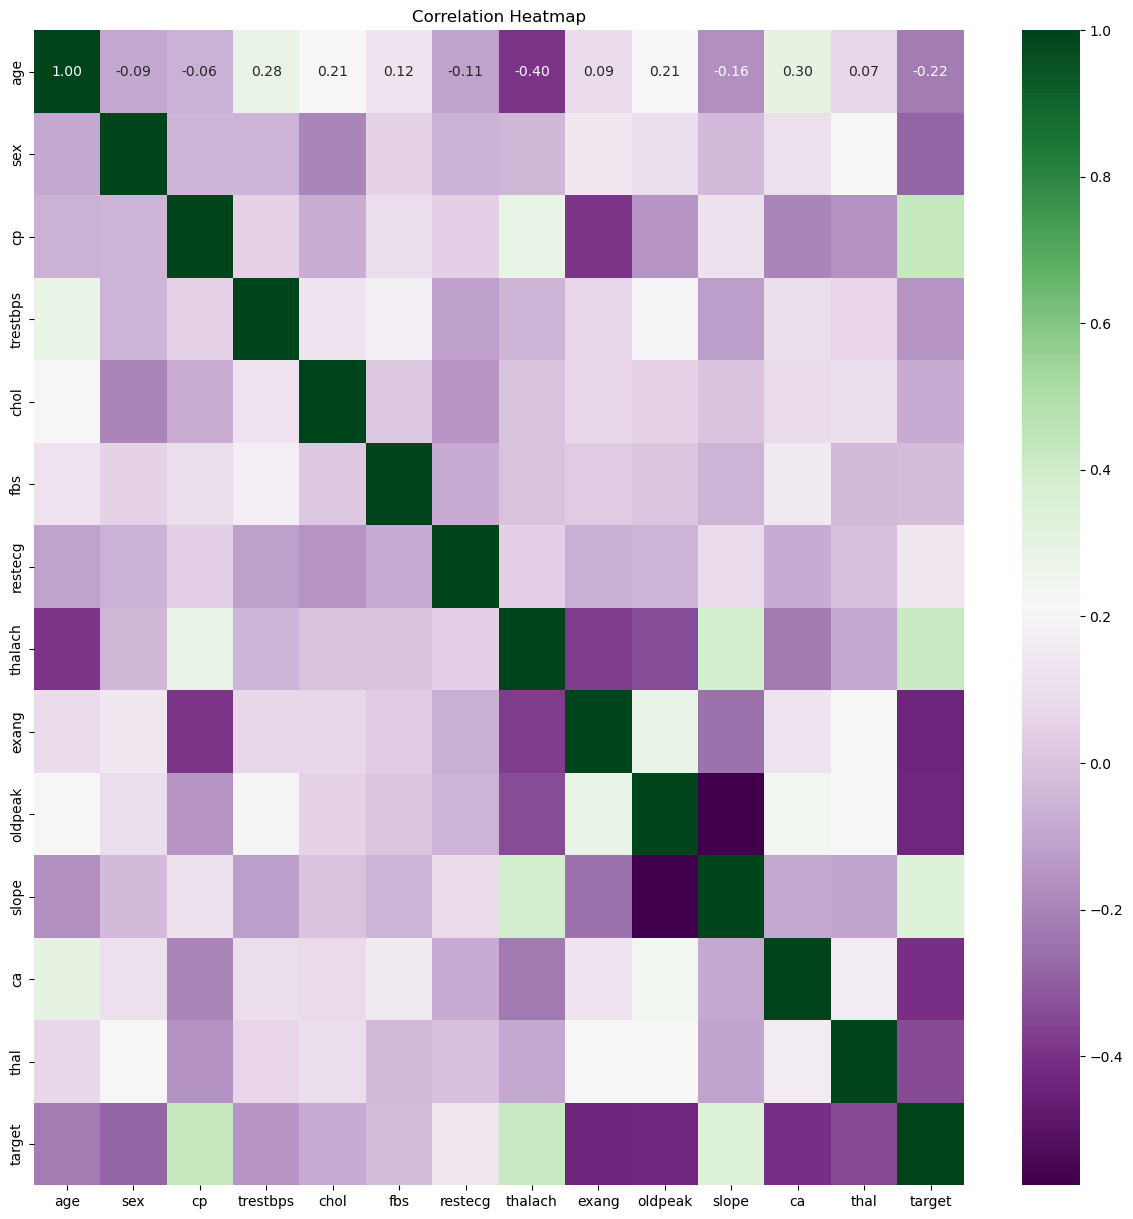

In [17]:
# Plot correlation heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(heart.corr(), annot=True, cmap="PRGn", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### Correlation Insights:
##### 1. Strong correlations with target (heart disease)
- cp (+0.432) → Chest pain type is highly predictive.
- thalach (+0.420) → Max heart rate achieved is strongly related.
- exang (-0.436) → Exercise-induced angina strongly linked to heart disease.
- oldpeak (-0.429) → ST depression from exercise test is important.
- ca (-0.409) → Number of major vessels visible is important.
- slope (+0.344) → Slope of ST segment during exercise is relevant.

##### 2. Notable correlations between independent variables
- cp & thalach → moderate positive correlation (0.293).
- oldpeak & slope → strong negative correlation (-0.576).

##### 3. Weak correlations with target
- fbs (fasting blood sugar): -0.027 (very weak).
- chol (cholesterol): -0.081 (very weak).
- restecg (resting ECG): +0.135 (weak).

##### 4. Modelling insights
- Top predictors: cp, thalach, exang, oldpeak, ca, slope.
- Low predictors: fbs, chol, restecg (may be dropped or given low weight).
- Check multicollinearity: e.g., oldpeak & slope have high correlation (-0.576).

#### Overall Insight:
The strongest predictors of heart disease are chest pain type, maximum heart rate, exercise-induced angina, ST depression, number of major vessels, and ST segment slope, while fasting blood sugar, cholesterol, and resting ECG show very weak correlations.

### 3. Feature Engineering

#### A. Add new featuers into the dataset.

Based on the strong correlations (**cp, thalach, exang, oldpeak**), let's create a few interaction and composite terms that might capture non-linear relationships

| **New Feature**  | **Formula**                   | **Rationale**                                                                                             |
| ---------------- | ----------------------------- | --------------------------------------------------------------------------------------------------------- |
| **cp_x_thalach** | `cp * thalach`                | Interacts the two strongest positive predictors to capture their combined effect.                         |
| **neg_impact**   | `exang + oldpeak + ca + thal` | A composite score for features negatively correlated with the target (high value = high negative impact). |
| **thalach_rate** | `thalach / age`               | Maximum heart rate relative to age, since age is also correlated with the outcome.                        |


In [18]:
# Step1: Interaction Term
heart['cp_x_thalach'] = heart['cp'] * heart['thalach']

# Step2. Composite Negative Impact Score
# Note: This assumes exang, ca, and thal are appropriately scaled or encoded (0/1 or categorical)
heart['neg_impact'] = heart['exang'] + heart['oldpeak'] + heart['ca'] + heart['thal']

# Step3. Rate-based Feature
heart['thalach_rate'] = heart['thalach'] / heart['age']

# Display the head to see the new features
heart.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_x_thalach,neg_impact,thalach_rate
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0,6.0,3.230769
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0,7.1,2.924528
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0,6.6,1.785714
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0,4.0,2.639344
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,0,6.9,1.709677


#### Insights:
**Step 1:**  I have multiplied chest pain type (cp) with maximum heart rate (thalach).
 - Think of it like: "What if chest pain + heart rate together give us stronger information about heart disease than looking at them separately?”
 - It captures the combined effect of two strong predictors.

**Step 2:** I am adding up several “bad sign” features (exercise-induced angina, ST depression, number of blocked vessels, and thalassemia).
 - Imagine this as a “risk score” – the higher it is, the more negative indicators a person has for heart disease.
 - Example: If someone has high ST depression, more blocked vessels, and exercise-induced angina → their score increases.

**Step 3** I'm looking at maximum heart rate compared to age.
 - Since older people usually have lower heart rates, this ratio helps adjust heart rate based on a person’s age.
 - Example: A 25-year-old with 180 bpm is normal, but a 65-year-old with 180 bpm is unusual → this feature captures that difference.

**In short:**
- **cp_x_thalach** = “Do chest pain + heart rate together reveal more?”
- **neg_impact** = “A combined risk score of negative health signs.”
- **thalach_rate** = “Heart rate relative to age.”

#### B. Check for duplicate values

In [19]:
duplicates = heart.duplicated().sum()

if duplicates==0:
    print("There are no duplicate values present in the dataset after adding more features")
else:
    print("There are duplicate values present in the dataset after adding more features:", duplicates)

There are no duplicate values present in the dataset after adding more features


### 3. Data Preprocessing

#### A. Split the data into X and y

In [20]:
# Separate features (X) and the target variable (y)
X = heart.drop('target', axis=1) # Indipendent Features
y = heart["target"] # Dependent Features

#### B. Split data into train and test. Keep 20% data reserved for testing

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [22]:
# Print the shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (241, 16)
X_test shape: (61, 16)
y_train shape: (241,)
y_test shape: (61,)


#### C. Scaling/Normalization

In [23]:
scaler = StandardScaler()

# Fit the scaler on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data 
X_test_scaled = scaler.transform(X_test)

#### 4. Model Building (Classification)

#### A. Logistic Regression

In [24]:
logreg = LogisticRegression(max_iter=1000, random_state=1)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=1)

#### Print evaluation metrics for the model and clearly share insights.

In [25]:
# Prediction
y_pred_logreg = logreg.predict(X_test_scaled)

# Classification Report
class_report_logreg = classification_report(y_test, y_pred_logreg)
print("Classification Report - Logistic Regression: \n",class_report_logreg)
print()
# Confusion matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix - Logistic Regression: \n",conf_matrix_logreg)
print()
# ROC-AUC score
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_logreg))

Classification Report - Logistic Regression: 
               precision    recall  f1-score   support

           0       0.90      0.93      0.91        28
           1       0.94      0.91      0.92        33

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61


Confusion Matrix - Logistic Regression: 
 [[26  2]
 [ 3 30]]

ROC-AUC Score: 0.9188311688311689


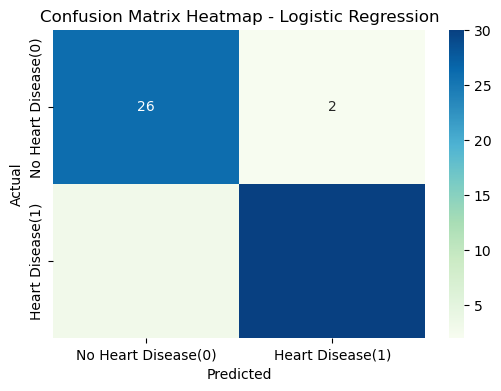

In [26]:
# Heatmap of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='GnBu', xticklabels=['No Heart Disease(0)','Heart Disease(1)'], yticklabels=['No Heart Disease(0)','Heart Disease(1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap - Logistic Regression')
plt.show()

#### Logestic Regression Model Insights

- **Accuracy:** 92% — model predicts heart disease correctly for most patients.
- **Balanced performance** between both classes (no heart disease = 0, heart disease = 1).
- **Precision:**
  - Class 0: 0.90 → few false alarms.
  - Class 1: 0.94 → strong confidence when predicting disease.

- **Recall:**
   - Class 0: 0.93
   - Class 1: 0.91 → correctly identifies 91% of real heart disease cases.

- **F1-Score:** Around 0.91–0.92 for both classes → balanced precision and recall.

- **Confusion Matrix:**
   - True Negatives: 26
   - False Positives: 2
   - False Negatives: 3
   - True Positives: 30

→ Only 5 out of 61 cases misclassified.

- **ROC-AUC Score:** 0.92 → excellent ability to distinguish between disease and non-disease.

- **Conclusion:**
   - Model is well-balanced and accurate.
   - Very few false negatives (important in medical predictions).
   - Reliable for detecting heart disease risk.

#### B. K-Nearest Neighbors (KNN) 

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

#### Print evaluation metrics for the model and clearly share insights.

In [28]:
# Prediction
y_pred_knn = knn.predict(X_test_scaled)

# Classification Report
class_report_knn= classification_report(y_test, y_pred_knn)
print("Classification Report - KNN: \n",class_report_knn)
print()
# Confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix -KNN: \n",conf_matrix_knn)
print()
# ROC-AUC score
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_knn))

Classification Report - KNN: 
               precision    recall  f1-score   support

           0       0.79      0.96      0.87        28
           1       0.96      0.79      0.87        33

    accuracy                           0.87        61
   macro avg       0.88      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61


Confusion Matrix -KNN: 
 [[27  1]
 [ 7 26]]

ROC-AUC Score: 0.8760822510822511


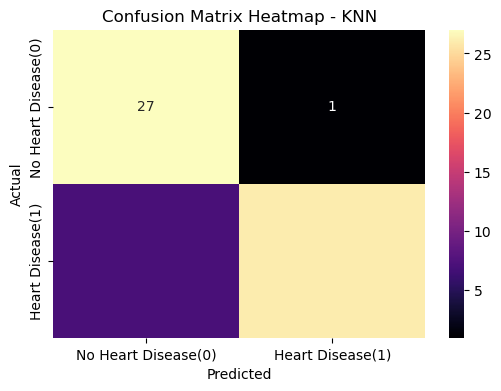

In [29]:
# Heatmap of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='magma', xticklabels=['No Heart Disease(0)','Heart Disease(1)'], yticklabels=['No Heart Disease(0)','Heart Disease(1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap - KNN')
plt.show()

#### KNN Model Insights

- **Accuracy:** 87% — model performs well, but slightly lower than Logistic Regression (92%).
- **Precision:**
   - Class 0: 0.79 → some false positives present.
   - Class 1: 0.96 → very high precision for predicting disease cases.

- **Recall:**
   - Class 0: 0.96 → very high true negative rate, most no-disease cases correctly identified.
   - Class 1: 0.79 → some disease cases missed.
   - F1-Score: Balanced (0.87 for both classes) but lower than Logistic Regression.

- **Confusion Matrix:**
   - True Negatives: 27
   - False Positives: 1
   - False Negatives: 7
   - True Positives: 26
→ Higher false negatives compared to Logistic Regression (important in healthcare).

- **ROC-AUC Score:** 0.876 → good discrimination ability but slightly lower than Logistic Regression (0.92).

**Key takeaway:**

- KNN is strong at identifying no-disease cases but misses more actual disease cases (false negatives = 7), which is a drawback for medical prediction.
- Logistic Regression still outperforms KNN overall in balanced prediction and ROC-AUC.

#### C. Decission Tree 

In [30]:
tree = DecisionTreeClassifier(max_depth=3, random_state=1)
tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

#### Print evaluation metrics for the model and clearly share insights.

In [31]:
# Prediction
y_pred_tree = tree.predict(X_test_scaled)

# Classification Report
class_report_tree= classification_report(y_test, y_pred_tree)
print("Classification Report - Decission Tree: \n",class_report_tree)
print()
# Confusion matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("Confusion Matrix - Decission Tree: \n",conf_matrix_tree)
print()
# ROC-AUC score
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_tree))

Classification Report - Decission Tree: 
               precision    recall  f1-score   support

           0       0.81      0.93      0.87        28
           1       0.93      0.82      0.87        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61


Confusion Matrix - Decission Tree: 
 [[26  2]
 [ 6 27]]

ROC-AUC Score: 0.8733766233766235


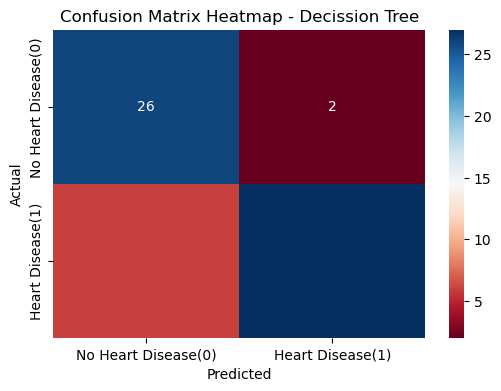

In [32]:
# Heatmap of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='RdBu', xticklabels=['No Heart Disease(0)','Heart Disease(1)'], yticklabels=['No Heart Disease(0)','Heart Disease(1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap - Decission Tree')
plt.show()

#### Decission Tree Model Insights

- **Accuracy:** 87% — similar to KNN but lower than Logistic Regression (92%).
- **Precision:**
   - Class 0: 0.81 → moderate precision for predicting no-disease cases.
   - Class 1: 0.93 → strong precision for predicting disease cases.

- **Recall:**
   - Class 0: 0.93 → very good true negative rate, most no-disease cases correctly identified.
   - Class 1: 0.82 → misses more disease cases compared to Logistic Regression.

- **F1-Score:** Balanced at 0.87 for both classes — good but not the best.

- **Confusion Matrix:**
  - True Negatives: 26
  - False Positives: 2
  - False Negatives: 6
  - True Positives: 27
→ Shows slightly more false negatives than Logistic Regression but fewer than KNN.

- **ROC-AUC Score:** 0.873 → good, but slightly lower than Logistic Regression (0.92) and similar to KNN (0.876).

**Key takeaway:**

- Decision Tree gives balanced precision and recall, but still has more false negatives than Logistic Regression.
- Logistic Regression still has the best overall performance for this dataset, with higher ROC-AUC and accuracy.

#### D. Random Forest 

In [33]:
forest = RandomForestClassifier(n_estimators=100, random_state=1)
forest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=1)

#### Print evaluation metrics for the model and clearly share insights.

In [34]:
# Prediction
y_pred_forest = forest.predict(X_test_scaled)

# Classification Report
class_report_forest = classification_report(y_test, y_pred_forest)
print("Classification Report - Random Forest: \n",class_report_forest)
print()
# Confusion matrix
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
print("Confusion Matrix - Random Forest: \n",conf_matrix_forest)
print()
# ROC-AUC score
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_forest))

Classification Report - Random Forest: 
               precision    recall  f1-score   support

           0       0.78      0.89      0.83        28
           1       0.90      0.79      0.84        33

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


Confusion Matrix - Random Forest: 
 [[25  3]
 [ 7 26]]

ROC-AUC Score: 0.8403679653679654


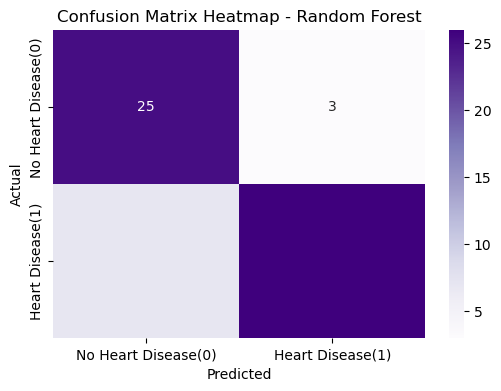

In [35]:
# Heatmap of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_forest, annot=True, fmt='d', cmap='Purples', xticklabels=['No Heart Disease(0)','Heart Disease(1)'], yticklabels=['No Heart Disease(0)','Heart Disease(1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap - Random Forest')
plt.show()

#### Random Forest Model Insights

- **Accuracy:** 84% — lower than Logistic Regression (92%), KNN (87%), and Decision Tree (87%).

- **Precision:**
   - Class 0: 0.78 → moderate precision for predicting no-disease cases.
   - Class 1: 0.90 → strong precision for predicting disease cases.

- **Recall:**
   - Class 0: 0.89 → good true negative rate — most no-disease cases correctly identified.
   - Class 1: 0.79 → misses more disease cases compared to Logistic Regression and Decision Tree.

🧩 F1-Score: Balanced around 0.83–0.84, slightly lower than other models.

- **Confusion Matrix:**
   - True Negatives: 25
   - False Positives: 3
   - False Negatives: 7
   - True Positives: 26
→ Higher false negatives compared to Logistic Regression and Decision Tree.

- **ROC-AUC Score:** 0.840 → lowest among tested models, indicating weaker separation ability.

**Key takeaway:**

- Random Forest provides good precision for disease detection but misses more true disease cases compared to Logistic Regression and Decision Tree.
- Lower accuracy and ROC-AUC indicate less reliable overall performance for this dataset compared to simpler models like Logistic Regression.

#### E. Gradient Boosting 

In [36]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=1, max_depth=3)
gb.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=1)

#### Print evaluation metrics for the model and clearly share insights.

In [37]:
# Prediction
y_pred_gb = gb.predict(X_test_scaled)

# Classification Report
class_report_gb = classification_report(y_test, y_pred_gb)
print("Classification Report - Gradient Boosting: \n",class_report_gb)
print()
# Confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix - Gradient Boosting: \n",conf_matrix_gb)
print()
# ROC-AUC score
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_gb))

Classification Report - Gradient Boosting: 
               precision    recall  f1-score   support

           0       0.79      0.93      0.85        28
           1       0.93      0.79      0.85        33

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61


Confusion Matrix - Gradient Boosting: 
 [[26  2]
 [ 7 26]]

ROC-AUC Score: 0.8582251082251082


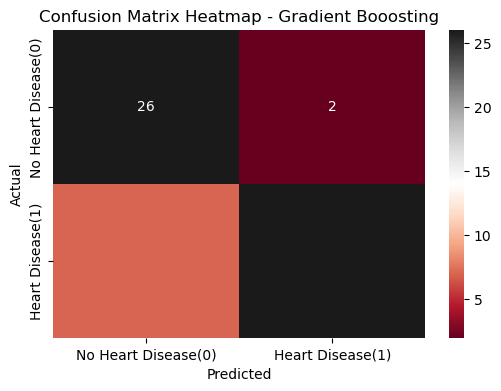

In [38]:
# Heatmap of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='RdGy', xticklabels=['No Heart Disease(0)','Heart Disease(1)'], yticklabels=['No Heart Disease(0)','Heart Disease(1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap - Gradient Booosting')
plt.show()

#### Gradient Boosting Model Insights

- **Accuracy:** 85% — slightly better than Random Forest (84%), but lower than Logistic Regression (92%), KNN (87%), and Decision Tree (87%).
- **Precision:**
   - Class 0: 0.79 → moderate precision for predicting no-disease cases.
   - Class 1: 0.93 → strong precision for predicting disease cases.
- **Recall:**
   - Class 0: 0.93 → very good detection rate for no-disease cases.
   - Class 1: 0.79 → misses some disease cases.

- **F1-Score:** Balanced around 0.85 for both classes — decent but not top-performing.

- **Confusion Matrix:**
   - True Negatives: 26
   - False Positives: 2
   - False Negatives: 7
   - True Positives: 26
→ False negatives are higher compared to Logistic Regression, which can be a concern for medical predictions.

- **ROC-AUC Score:** 0.858 → decent discrimination ability, but lower than Logistic Regression (0.92) and slightly higher than Random Forest (0.84).

**Key takeaway:**

- Gradient Boosting performs well with balanced precision and recall, especially for disease cases.
- However, Logistic Regression still outperforms it overall in accuracy and ROC-AUC.
- Gradient Boosting can be a good alternative if tuning hyperparameters further.

#### F. XGBoost Classifier (eXtreme Gradient Boosting)

In [39]:
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=1)
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

#### Print evaluation metrics for the model and clearly share insights.

In [40]:
# Prediction
y_pred_xgb = xgb.predict(X_test_scaled)

# Classification Report
class_report_xgb = classification_report(y_test, y_pred_xgb)
print("Classification Report - XGBoost: \n",class_report_xgb)
print()
# Confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix - XGBoost: \n",conf_matrix_xgb)
print()
# ROC-AUC score
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_xgb))

Classification Report - XGBoost: 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.90      0.82      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61


Confusion Matrix - XGBoost: 
 [[25  3]
 [ 6 27]]

ROC-AUC Score: 0.8555194805194806


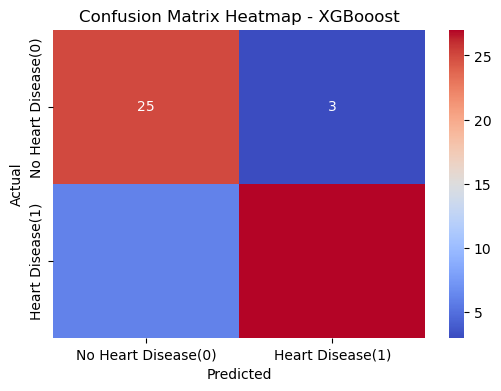

In [41]:
# Heatmap of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Heart Disease(0)','Heart Disease(1)'], yticklabels=['No Heart Disease(0)','Heart Disease(1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap - XGBooost')
plt.show()

#### XGBoost Model Insights

- **Accuracy:** 85% — similar to Gradient Boosting (85%), better than Random Forest (84%), but lower than Logistic Regression (92%).
- **Precision:**
  - Class 0: 0.81 → good precision for predicting no-disease cases.
  - Class 1: 0.90 → strong precision for predicting disease cases.

- **Recall:**
   - Class 0: 0.89 → high ability to correctly identify no-disease cases.
   - Class 1: 0.82 → some missed disease cases compared to Logistic Regression.

- **F1-Score:** Balanced at ~0.85 for both classes — consistent performance.

- **Confusion Matrix:**
   - True Negatives: 25
   - False Positives: 3
   - False Negatives: 6
   - True Positives: 27
→ Slightly more false negatives compared to Logistic Regression, which is critical in medical applications.

- **ROC-AUC Score:** 0.856 → good model discrimination, slightly lower than Gradient Boosting (0.858) and Logistic Regression (0.92).

**Key takeaway:**

- XGBoost provides good balanced performance with strong precision for both classes.
- However, Logistic Regression still outperforms it in accuracy and ROC-AUC.
- XGBoost could be a competitive option with further hyperparameter tuning.

#### G. Support Vector Machine (SVM) 

In [42]:
SVM = SVC(kernel='rbf', C=1.0, gamma='scale')
SVM.fit(X_train_scaled, y_train)

SVC()

#### Print evaluation metrics for the model and clearly share insights.

In [43]:
# Prediction
y_pred_SVM = SVM.predict(X_test_scaled)

# Classification Report
class_report_SVM = classification_report(y_test, y_pred_SVM)
print("Classification Report - SVM: \n",class_report_SVM)
print()
# Confusion matrix
conf_matrix_SVM = confusion_matrix(y_test, y_pred_SVM)
print("Confusion Matrix - SVM: \n",conf_matrix_SVM)
print()
# ROC-AUC score
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_SVM))

Classification Report - SVM: 
               precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.91      0.88      0.89        33

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61


Confusion Matrix - SVM: 
 [[25  3]
 [ 4 29]]

ROC-AUC Score: 0.8858225108225108


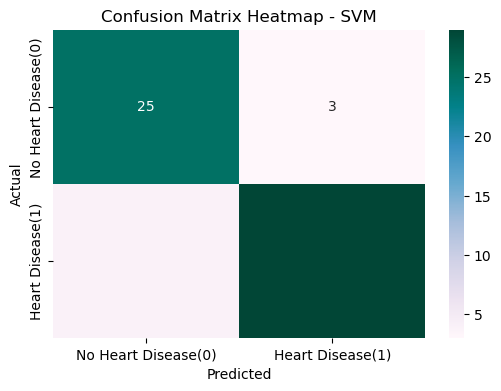

In [44]:
# Heatmap of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_SVM, annot=True, fmt='d', cmap='PuBuGn', xticklabels=['No Heart Disease(0)','Heart Disease(1)'], yticklabels=['No Heart Disease(0)','Heart Disease(1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap - SVM')
plt.show()

#### SVM Model Insights

- **Accuracy:** 89% — second only to Logistic Regression (92%), making it one of the top-performing models.

- **Precision:**
   - Class 0: 0.86 → good precision for predicting no-disease cases.
   - Class 1: 0.91 → strong precision for predicting disease cases.

- **Recall:**
    - Class 0: 0.89 → high ability to correctly identify no-disease cases.
    - Class 1: 0.88 → strong detection of disease cases with few misses.

- **F1-Score:** Balanced at ~0.88–0.89 for both classes — high and consistent performance.

- **Confusion Matrix:**
   - True Negatives: 25
   - False Positives: 3
   - False Negatives: 4
   - True Positives: 29
→ Low false negatives, which is important in medical diagnostics.

- **ROC-AUC Score:** 0.886 → strong discrimination ability, second only to Logistic Regression (0.92).

**Key takeaway:**

- SVM is a strong competitor to Logistic Regression with balanced precision and recall, high accuracy, and good ROC-AUC.
- It has low false negatives (only 4), which is important in predicting heart disease.
- Logistic Regression still slightly outperforms SVM overall, but SVM is a close second and worth considering.

### 5. Model Performance Comparison Table

| Model               | Accuracy | Precision (0) | Precision (1) | Recall (0) | Recall (1) | F1-score (macro) | ROC-AUC  | False Negatives |
| ------------------- | -------- | ------------- | ------------- | ---------- | ---------- | ---------------- | -------- | --------------- |
| Logistic Regression | **0.92** | 0.90          | 0.94          | 0.93       | 0.91       | **0.92**         | **0.92** | 3               |
| SVM                 | 0.89     | 0.86          | 0.91          | 0.89       | 0.88       | 0.88             | 0.886    | 4               |
| KNN                 | 0.87     | 0.79          | 0.96          | 0.96       | 0.79       | 0.87             | 0.876    | 7               |
| Decision Tree       | 0.87     | 0.81          | 0.93          | 0.93       | 0.82       | 0.87             | 0.873    | 6               |
| Gradient Boosting   | 0.85     | 0.79          | 0.93          | 0.93       | 0.79       | 0.85             | 0.858    | 7               |
| XGBoost             | 0.85     | 0.81          | 0.90          | 0.89       | 0.82       | 0.85             | 0.856    | 6               |
| Random Forest       | 0.84     | 0.78          | 0.90          | 0.89       | 0.79       | 0.84             | 0.840    | 7               |


#### Key Insights from Comparison

- **Best Overall:** Logistic Regression — highest accuracy (92%), ROC-AUC (0.92), and lowest false negatives (3).
- **Second Best:** SVM — strong accuracy (89%), ROC-AUC (0.886), balanced precision and recall, low false negatives (4).
- **Good Alternatives:**
   - KNN and Decision Tree — accuracy (87%) and balanced performance, but higher false negatives.
- **Lower Performers:** Random Forest, Gradient Boosting, XGBoost — good but slightly weaker in accuracy and ROC-AUC.
- **Medical Importance:** Logistic Regression and SVM stand out due to the lowest false negatives, which is critical in heart disease prediction.

#### Conclusion:

In this study, we evaluated several machine learning models to predict heart disease outcomes. Among them, **Logistic Regression** emerged as the top performer, achieving the highest accuracy and ROC-AUC score, and effectively minimizing false negatives. **SVM** also demonstrated strong performance, closely following Logistic Regression. Other models like **KNN, Decision Tree, Gradient Boosting, XGBoost, and Random Forest** also performed well, but with slightly lower metrics in comparison.

Overall, the results indicate that **Logistic Regression** is the most reliable model for this dataset, providing both high accuracy and robust generalization. This makes it a strong candidate for heart disease prediction in practical applications.